<a href="https://colab.research.google.com/github/chinmaykumar06/SHALA-2020/blob/master/Assignment_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd 'drive'

/content/drive


In [0]:
%cd 'My Drive'

/content/drive/My Drive


In [0]:
%cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [0]:
%cd 'data_ML'

/content/drive/My Drive/Colab Notebooks/data_ML


In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

In [0]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [0]:
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x: 0 if x=="male" else 1)
titanic_new = titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [0]:
titanic_new['Age'].fillna((titanic_new['Age'].mean()), inplace=True)
titanic_new['Embarked'].fillna((titanic_new['Embarked'].mode()[0]), inplace=True)
titanic_new.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
titanic_new = pd.get_dummies(titanic_new)
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf77a1b5c0>,
      dtype=object)

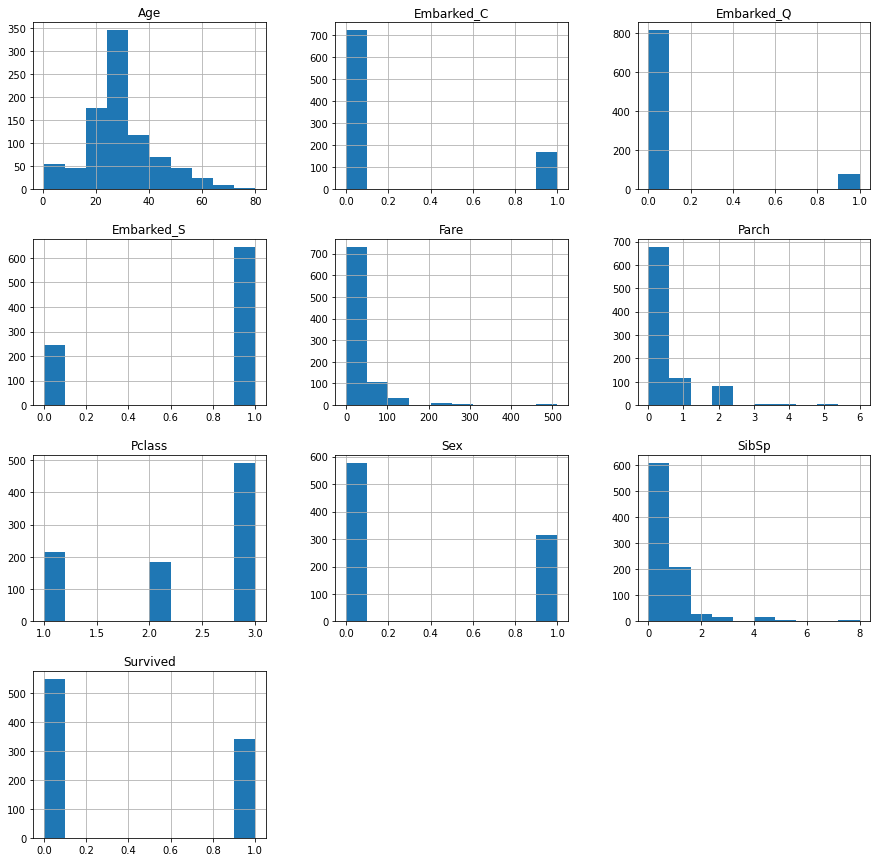

In [0]:
titanic_new.hist(figsize=(15,15))

In [0]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X = titanic_new.drop(['Survived'], axis=1)
Y = titanic_new['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

**DECISION TREE CLASSIFIER**

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score
from sklearn.metrics import classification_report

In [0]:
dt = DecisionTreeClassifier(max_depth=10, random_state=1) 
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
print('The training results are :')
print(classification_report(y_train, dt.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, dt.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       439
           1       0.96      0.86      0.91       273

    accuracy                           0.93       712
   macro avg       0.94      0.92      0.93       712
weighted avg       0.93      0.93      0.93       712

The testing results are :
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



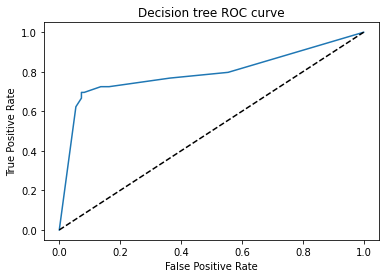

In [0]:
from sklearn.metrics import roc_curve  

y_pred_proba = dt.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.79


**VOTING CLASSIFIER**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

In [0]:
lr = LogisticRegression(random_state=7)
knn = KNN()
dt = DecisionTreeClassifier(max_depth=10, random_state=7)

classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [0]:
import warnings
warnings.filterwarnings("ignore")
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.788
K Nearest Neighbours : 0.698
Classification Tree : 0.832


In [0]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers, voting='soft')
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('The training results are :')
print(classification_report(y_train, vc.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, vc.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       439
           1       0.96      0.85      0.90       273

    accuracy                           0.93       712
   macro avg       0.94      0.91      0.92       712
weighted avg       0.93      0.93      0.93       712

The testing results are :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



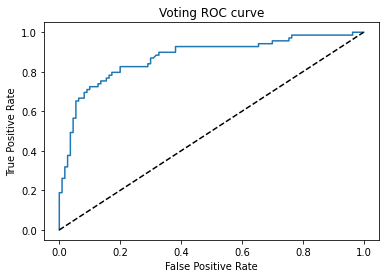

In [0]:
from sklearn.metrics import roc_curve  

y_pred_proba = vc.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.87


**BAGGING**

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=0.05, random_state=7)

bc = BaggingClassifier(base_estimator=dt, n_estimators=400, n_jobs=-1) 

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

print('The training results are :')
print(classification_report(y_train, bc.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, bc.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       439
           1       0.85      0.59      0.69       273

    accuracy                           0.80       712
   macro avg       0.82      0.76      0.77       712
weighted avg       0.81      0.80      0.79       712

The testing results are :
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



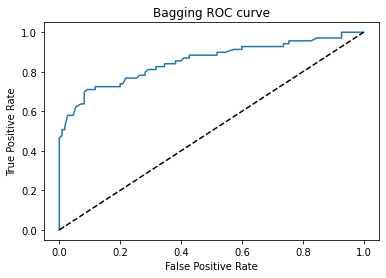

In [0]:
from sklearn.metrics import roc_curve  

y_pred_proba = bc.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.85


**RANDOM FOREST CLASSIFICATION**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [0]:
rfc = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.05, random_state=7)
# Fit 'rf' to the training set
rfc.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rfc.predict(X_test)

print('The training results are :')
print(classification_report(y_train, rfc.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, rfc.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       439
           1       0.82      0.63      0.71       273

    accuracy                           0.81       712
   macro avg       0.81      0.77      0.78       712
weighted avg       0.81      0.81      0.80       712

The testing results are :
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       110
           1       0.86      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



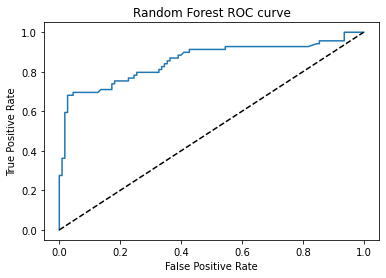

In [0]:
from sklearn.metrics import roc_curve  

y_pred_proba = rfc.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.86


**BOOSTING**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt = DecisionTreeClassifier(max_depth=10, random_state=7)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=7, learning_rate=0.000005)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

print('The training results are :')
print(classification_report(y_train, adb_clf.predict(X_train)))
print('The testing results are :')
print(classification_report(y_test, adb_clf.predict(X_test)))

The training results are :
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       439
           1       0.98      0.85      0.91       273

    accuracy                           0.94       712
   macro avg       0.95      0.92      0.93       712
weighted avg       0.94      0.94      0.94       712

The testing results are :
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



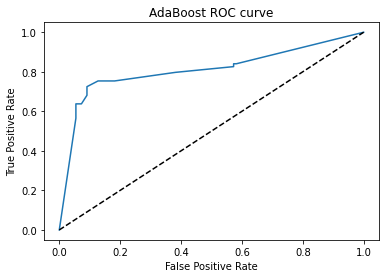

In [0]:
from sklearn.metrics import roc_curve  

y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC curve')
# show the plot
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score

score_val = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(score_val))

ROC AUC score: 0.81
